# Livrable 1 : Classification Binaire
|Erwan Martin|Thibaut Liger-Hellard|Arnaud Maturel|Guillaume Le Cocguen|Victorien Goudeau|
|------------|---------------------|--------------|--------------------|-----------------|

**Contexte**:
L'objectif de ce livrable est classifier les photos des "non-photos" parmis les images du dataset.
La classification sera donc binaire.


# import des librairies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL

import os

import sklearn
import tensorflow as tf
import tensorboard


In [2]:
#verify GPU available (not mendatory)
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Préparation des données
Afin de faire la classification binaire des images il va falloir préparer nos données en étiquettant nos images et en les mettant a la même échelle (scaling).

In [74]:
#data path definition
f = open('../data/path.txt', "r")
DATAPATH = f.read()
print(DATAPATH)

D:\CESI\A5\datascience\Projet\data


In [92]:
# dataset creation
labels = []
imgs = []

#creating labels table -----------------------------
for i in os.listdir(path=DATAPATH):
    if os.path.isdir(DATAPATH+"/"+i):
        labels.append(i)
#end creating labels table -----------------------------

#removing livrable2  from dataset------------------------
labels.remove("Dataset_L2")
labels.remove("Photo_2")
#end removing livrable2 from dataset------------------------


print(f"LABELS : {labels}")

#create BIG csv with image path + label
csv = open("../data/dataset_L1.csv", "w")
csv.write("pathname;label\n")
for label in labels:
    if label == "Photo":
        l = 1
    else:
        l=0
    for img in os.listdir(path=DATAPATH+"/"+label):
        csv.write(DATAPATH+"/"+label+"/"+img+";"+str(l)+"\n")
csv.close()

LABELS : ['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


maintenant, il faut le load dans un pandas, regardons ce que ca donne:

In [102]:
data = pd.read_csv("../data/dataset_L1.csv", sep=';')
data.head()

,pathname,label
0,D:\CESI\A5\datascience\Projet\data/Painting/pa...,0
1,D:\CESI\A5\datascience\Projet\data/Painting/pa...,0
2,D:\CESI\A5\datascience\Projet\data/Painting/pa...,0
3,D:\CESI\A5\datascience\Projet\data/Painting/pa...,0
4,D:\CESI\A5\datascience\Projet\data/Painting/pa...,0


<BatchDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


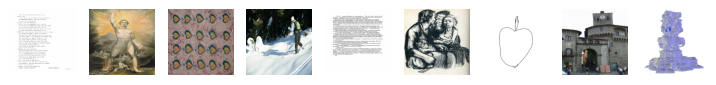

In [135]:
import sklearn.model_selection


img_height = 400
img_width = 400


def getImage(img_path, label):
        image = tf.io.read_file(img_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, [img_width, img_height])
        return image, label


train_df, test_df = sklearn.model_selection.train_test_split(data, test_size=0.3, shuffle=True, random_state=42)



train_set = tf.data.Dataset.from_tensor_slices((train_df["pathname"].values, train_df["label"].values)).map(getImage).batch(100)
test_set = tf.data.Dataset.from_tensor_slices((test_df["pathname"].values, test_df["label"].values)).map(getImage).batch(100)



print(train_set)

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax =  plt.subplot(1,10,i+1)
        plt.imshow(images[i]/255, cmap=plt.cm.binary)
        plt.axis("off")
